<a href="https://colab.research.google.com/github/riya-29/DataAnalytics/blob/main/AML_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np

#For Visualization

import matplotlib.pyplot as plt
import matplotlib.lines as mlines   # has all 2D line classes which can draw with a variety of line styles, markers and colors
import seaborn as sns   

df = pd.read_csv('aml_detect.csv')
print(pd.concat([df.head(5),df.tail(5)]))

         step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1           1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2           1  TRANSFER    181.00  C1305486145         181.00            0.00   
3           1  CASH_OUT    181.00   C840083671         181.00            0.00   
4           1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
4127808   302   PAYMENT  19570.36  C1922908839       10617.79            0.00   
4127809   302   PAYMENT  21468.41  C1928546176           0.00            0.00   
4127810   302   PAYMENT   8162.15  C2073267924           0.00            0.00   
4127811   302   PAYMENT  11991.25  C1061794721           0.00            0.00   
4127812   302   PAYMENT   1177.53   C540233605           0.00            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0        M1979787155        

### Data Description

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - Types of Payment- CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**nameDest** - customer who received the transaction amount

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**oldbalanceDest** - initial balance recipient before the transaction.

**newbalanceDest** - new balance recipient after the transaction.

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation.

**isFlaggedFraud** - Marked as fraud, when an illegal attempt in this dataset is an attempt to transfer more than 2,00,000 in a single transaction.

In [26]:
# No. of fraudulent & genuine transactions
print(df['isFraud'].value_counts())

0.0    4124401
1.0       3411
Name: isFraud, dtype: int64


In [27]:
print("Minimum amount flagged as fraud -", df[df['isFraud']==1].amount.min())
print("Maximum amount flagged as fraud -", df[df['isFraud']==1].amount.max())

Minimum amount flagged as fraud - 0.0
Maximum amount flagged as fraud - 10000000.0


CASH_OUT    1465346
PAYMENT     1393741
CASH_IN      903456
TRANSFER     339878
DEBIT         25392
Name: type, dtype: int64


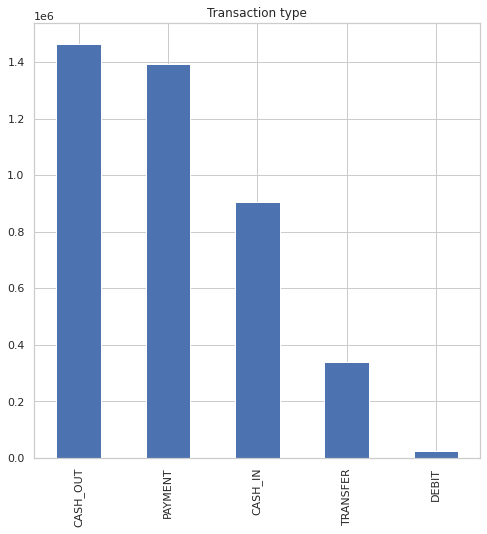

In [28]:
# No. of fraudulent and genuine transactions based on type of payment chosen by the customer
cnt = df['type'].value_counts()
print(cnt)
df['type'].value_counts().plot(kind='bar',title='Transaction type',figsize=(8,8))

In [31]:
# Examining the different feature type present in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4127813 entries, 0 to 4127812
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 346.4+ MB


In [34]:
# Shape of data frame
df.shape

(4127813, 11)

In [51]:
# Sum of null value in data set
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [54]:
# Drop null values from dataset
df.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4127807,302,PAYMENT,27164.46,C1887100417,37782.24,10617.79,M610705663,0.0,0.0,0.0,0.0
4127808,302,PAYMENT,19570.36,C1922908839,10617.79,0.00,M1415512540,0.0,0.0,0.0,0.0
4127809,302,PAYMENT,21468.41,C1928546176,0.00,0.00,M1669554297,0.0,0.0,0.0,0.0
4127810,302,PAYMENT,8162.15,C2073267924,0.00,0.00,M1475228059,0.0,0.0,0.0,0.0


#### Conclusions:
There are no Missing values in the data Currently.. so we can proceed with our EDA furthur

### Exploratory Data Analysis (EDA)

#### Number of fraudulent and geniune transactions

In [55]:
# Check the fraud/Non_Fraud related records
df['isFraud'].value_counts()

0.0    4124401
1.0       3411
Name: isFraud, dtype: int64

In [56]:
# find % values of isFraud
(df.groupby('isFraud')['isFraud'].count()/df['isFraud'].count()) *100

isFraud
0.0    99.917365
1.0     0.082635
Name: isFraud, dtype: float64

In [57]:
#No. of records based on customer and merchant transactions at origin and destination accounts
print("Customer-Customer Transactions",df.loc[(df.nameOrig.str.contains("C")) & (df.nameDest.str.contains("C"))].shape[0])
print("Customer-Merchant Transactions",df.loc[(df.nameOrig.str.contains("C")) & (df.nameDest.str.contains("M"))].shape[0])
print("Merchant-Customer Transactions",df.loc[(df.nameOrig.str.contains("M")) & (df.nameDest.str.contains("C"))].shape[0])
print("Merchant-Merchant Transactions",df.loc[(df.nameOrig.str.contains("M")) & (df.nameDest.str.contains("M"))].shape[0])


Customer-Customer Transactions 2734072
Customer-Merchant Transactions 1393740
Merchant-Customer Transactions 0
Merchant-Merchant Transactions 0


There are only frauds detected between customer-customer at origin and destination accounts. Therefore, nameOrig and nameDest columns won't help in detecting any pattern for fraud happening

In [58]:
#There are only frauds detected between customer-customer at origin and destination accounts. 
#Therefore, nameOrig and nameDest coulumns won't help in detecting any pattern for fraud happening
print("Fraud Detected between Customer-Customer Tractions-", df.loc[(df.nameOrig.str.contains('C')) & (df.nameDest.str.contains('C')) & (df.isFraud == 1)].shape[0])
print("Fraud Detected between Customer-Merchant Tractions-", df.loc[(df.nameOrig.str.contains('C')) & (df.nameDest.str.contains('M')) & (df.isFraud == 1)].shape[0])


Fraud Detected between Customer-Customer Tractions- 3411
Fraud Detected between Customer-Merchant Tractions- 0


In [59]:
#Filtering the dataset with only relevent types of payment which have fraud cases in it
print(df.groupby(['type','isFraud']).size())

type      isFraud
CASH_IN   0.0         903456
CASH_OUT  0.0        1463631
          1.0           1715
DEBIT     0.0          25392
PAYMENT   0.0        1393740
TRANSFER  0.0         338182
          1.0           1696
dtype: int64


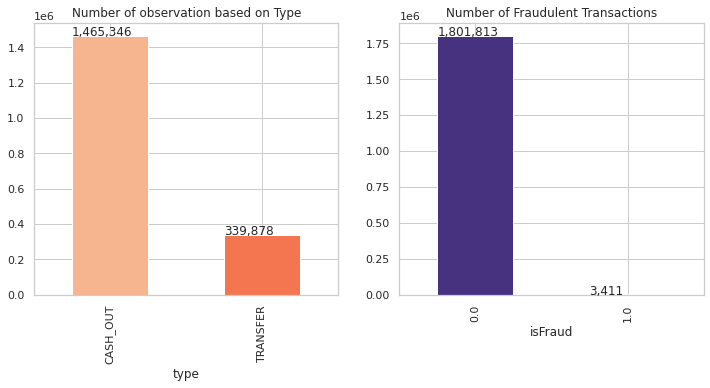

In [61]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

fig = plt.figure(figsize= (12,5))
fig.add_subplot(121)
ax = X.groupby('type').size().plot(kind ='bar', color=sns.color_palette('rocket_r'))
plt.title('Number of observation based on Type')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

fig.add_subplot(122)
bx = X['isFraud'].value_counts().plot(kind ='bar', color=sns.color_palette('viridis'))
plt.title('Number of Fraudulent Transactions')
plt.xlabel('isFraud')
for p in bx.patches:
    bx.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))


#### Conclusions:
- Total number of data point is 4124401 in which 3411 is fraud and 4124401 is not fraud data point.
- This shows that the Data is highly imblanced. Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions as compared to the fraudalent transactions.
- Hence, we have to be careful in reporting our results and accuracy might not be a good parameter to report for this classification problem. We will look at precision and recall.
- Also, to improve results we might have to apply pre-processing techniques of undersampling the non-fraudulant transactions or oversampling of fradulant transactions while train-test split.

**Transaction is flagged fraud if the amount transferred is more than 200,000**

### Minimum and Maximum amount that is transferred in flagged transactions

In [62]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0.0,1.0
type,,
CASH_IN,903456,0
CASH_OUT,1463631,1715
DEBIT,25392,0
PAYMENT,1393740,0
TRANSFER,338182,1696


**Fraud occurs only in 2 type of transactions:** TRANSFER and CASH_OUT

Above table suggests that the fraud happens only if the type is 'Cash_out' or 'Transfer'. Perhaps, only selecting those cases might increase the accuracy of the model.

- The number of fraudulent TRANSFERs = 1696

- The number of fraudulent CASH_OUTs = 1715

The type of transactions in which isFlaggedFraud is set : TRANSFER

### Number of Fraudulent and Geniune Transactions based on type of payment mode choosen by the customer

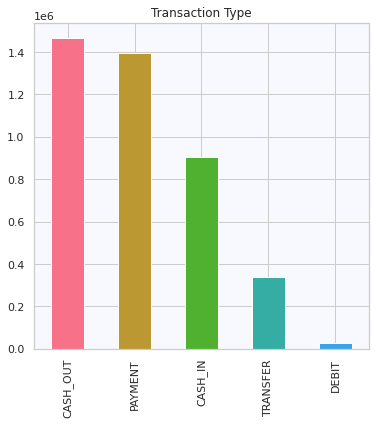

In [63]:
ax = df['type'].value_counts().plot( kind ='bar', title = 'Transaction Type', figsize= (6,6), color=sns.color_palette('husl'))
ax.set_facecolor("ghostwhite")

#### Inference:
There are 2 flags which stand out to me and it's interesting to look onto: **isFraud** and **isFlaggedFraud** column. From the hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered.

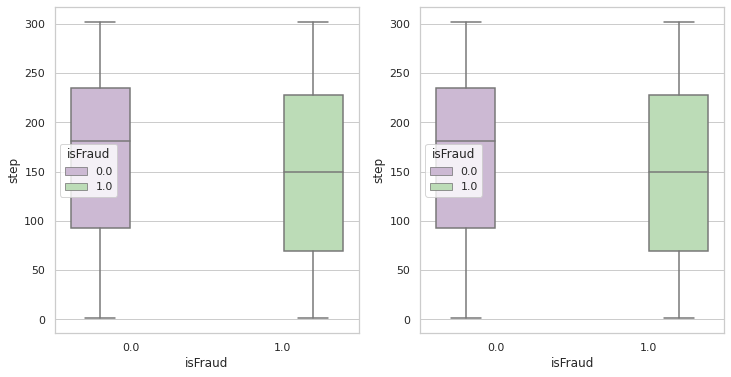

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="isFraud", y="step", hue="isFraud",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="step", hue="isFraud",data=df, palette="PRGn",showfliers=False)
plt.show()

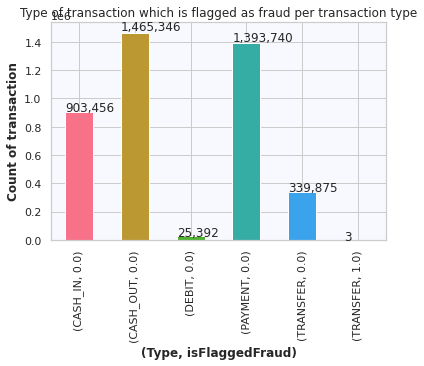

In [65]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar', color=sns.color_palette('husl'))
ax.set_title("Type of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Count of transaction", fontsize=12, fontweight = 'bold')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
ax.set_facecolor("ghostwhite")

In [66]:
XFraud = X.loc[X.isFraud==1]
XNonFraud = X.loc[X.isFraud==0]

### Fraction of Fraudulent transactions with oldbalanceDest and newBalanceDest = 0 with amount transacted not equal to zero

In [67]:
Fraudpercent = len(XFraud.loc[(XFraud.oldbalanceDest == 0) & (XFraud.newbalanceDest == 0) & (XFraud.amount !=0 )]) / (len(XFraud))

print("% of fraud transactions where old and new balance doesn't get updated is : ",Fraudpercent*100)

% of fraud transactions where old and new balance doesn't get updated is :  48.929932571093524


#### Conclusion: 
- 50% of fraudulent transactions don't update old and new balances in the destination accounts, 
- Where as only 0.06% of non-fraudulent transactions update old and new balances, 
- This says that newBalanceDest being zero is a strong indicator or fraudulent transaction, hence we'll not impute the data but we'll replace it with -1 for our algorithm to be able to detect it more accurately.

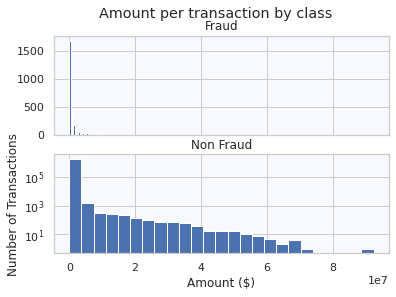

In [68]:
# Amount Vs number of transaction
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 25
ax1.hist(X.loc[X.isFraud==1].amount, bins = bins)
ax1.set_title('Fraud')
ax1.set_facecolor("ghostwhite")
ax2.hist(X.loc[X.isFraud==0].amount, bins = bins)
ax2.set_title('Non Fraud')
ax2.set_facecolor("ghostwhite")
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
# plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [69]:
# Transform categorical feature(s) to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.type = le.fit_transform(df.type)

In [70]:
# Explore correlations to label
df.corr().isFlaggedFraud.sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.029644
amount            0.003607
type              0.001450
step              0.000784
oldbalanceOrg     0.000421
newbalanceOrig    0.000409
oldbalanceDest   -0.000337
newbalanceDest   -0.000341
Name: isFlaggedFraud, dtype: float64

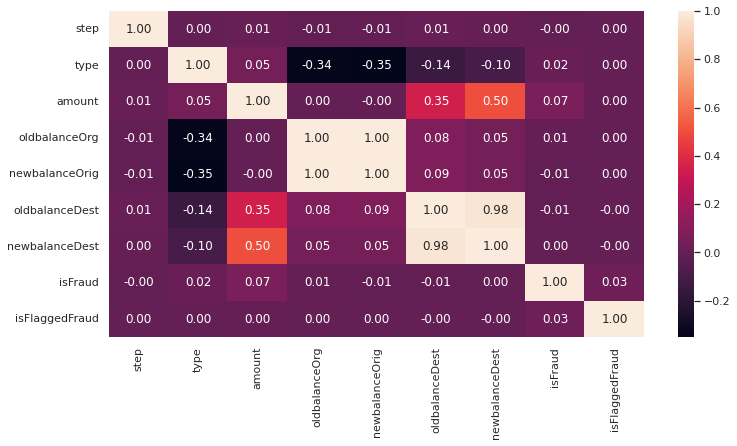

In [71]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

Text(0.5, 0, 'hour')

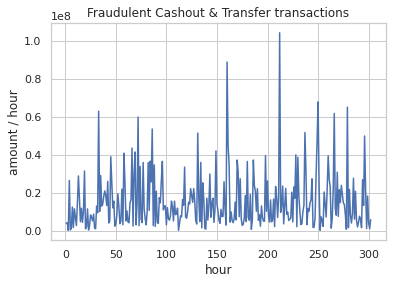

In [72]:
dfFraudPerHour = XFraud.groupby('step').sum()
plt.plot(dfFraudPerHour['amount'])
plt.ylabel('amount / hour')
plt.title('Fraudulent Cashout & Transfer transactions')
plt.xlabel('hour')

In [73]:
X['step_day'] = X['step'].map(lambda x: x//24)
X['hour'] = X['step'].map(lambda x: x%24)
X['step_week'] = X['step_day'].map(lambda x: x//7)

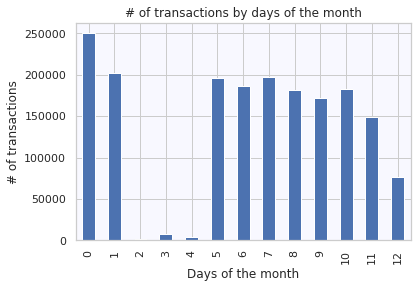

In [74]:
ax = X['step_day'].value_counts().sort_index(ascending=True).plot(kind = 'bar')
ax.set_xlabel("Days of the month")
ax.set_ylabel("# of transactions")
ax.set_title("# of transactions by days of the month")
ax.set_facecolor("ghostwhite")
sns.set(style="whitegrid")

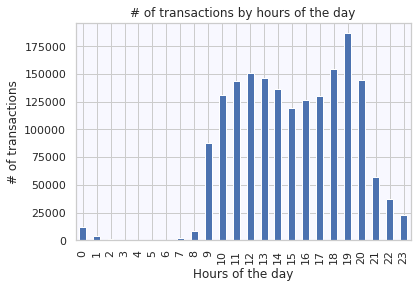

In [75]:
ax = X['hour'].value_counts().sort_index(ascending=True).plot(kind = 'bar')
ax.set_xlabel("Hours of the day")
ax.set_ylabel("# of transactions")
ax.set_title("# of transactions by hours of the day")
ax.set_facecolor("ghostwhite")

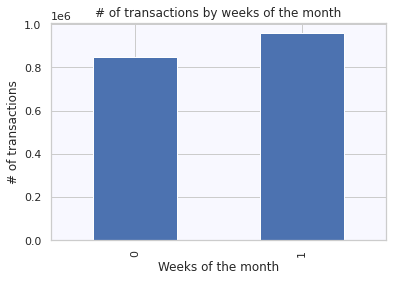

In [76]:
ax = X['step_week'].value_counts().sort_index(ascending=True).plot(kind ='bar')
ax.set_xlabel("Weeks of the month")
ax.set_ylabel("# of transactions")
ax.set_title("# of transactions by weeks of the month")
ax.set_facecolor("ghostwhite")

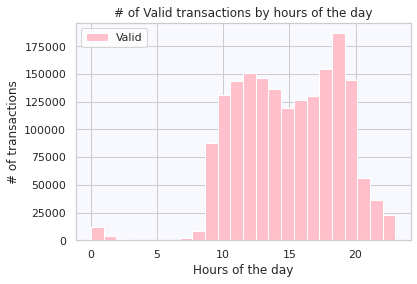

In [77]:
X[(X.isFraud == 0)]['hour'].plot.hist(bins=24,color='pink',label='Valid').set_facecolor("ghostwhite")
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by hours of the day")
plt.legend()
plt.show()

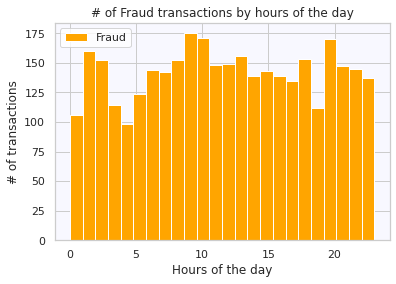

In [78]:
X[(X.isFraud == 1)]['hour'].plot.hist(bins=24,color='orange',label='Fraud').set_facecolor("ghostwhite")
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by hours of the day")
plt.legend()
plt.show()

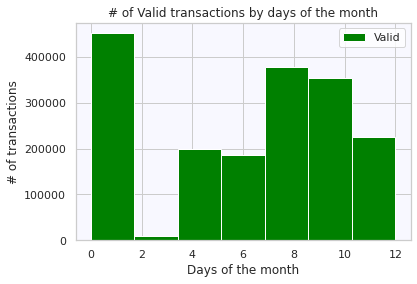

In [79]:
X[(X.isFraud == 0)]['step_day'].plot.hist(bins=7,color='green',label='Valid').set_facecolor("ghostwhite")
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by days of the month")
plt.legend()
plt.show()

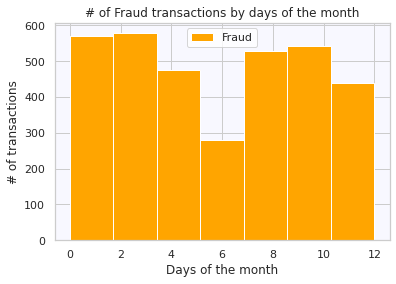

In [80]:
fig, ax = plt.subplots() #1,2, figsize=(7,9)
X[(X.isFraud == 1)]['step_day'].plot.hist(bins=7,color='orange',label='Fraud').set_facecolor("ghostwhite")
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by days of the month")
plt.legend()
plt.show()

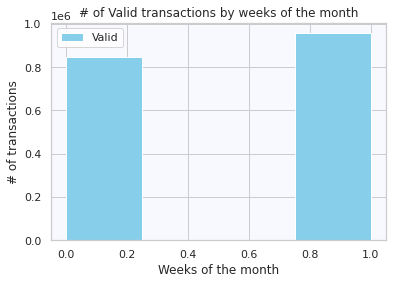

In [85]:
X[(X.isFraud == 0)]['step_week'].plot.hist(bins=4,color='skyblue',label='Valid').set_facecolor("ghostwhite")
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by weeks of the month")
plt.legend()
plt.show()

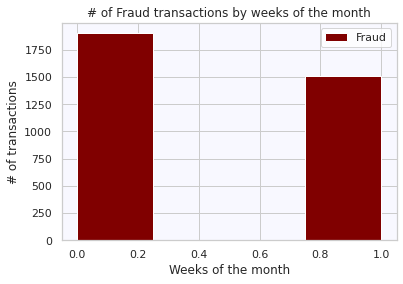

In [86]:
X[(X.isFraud == 1)]['step_week'].plot.hist(bins=4,color='Maroon',label='Fraud').set_facecolor("ghostwhite")
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by weeks of the month")
plt.legend()
plt.show()

In [87]:
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = - 1


In [88]:
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), \
      ['oldbalanceOrg', 'newbalanceOrig']] = -1

### Feature Engineering

- New features created which includes errors encountered at account balance in origin and destination.
- These new features will be important in obtaining the best performance from the ML algorithm.

In [89]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

In [90]:
X.errorBalanceOrig.loc[(X.errorBalanceOrig == 0) & (df.isFraud == 1)].count()

3377

In [91]:
X.errorBalanceOrig.loc[(X.errorBalanceOrig == 0) & (df.isFraud == 0)].count()

158032

In [92]:
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int)

In [93]:
print('The Fraud Transaction in filtered dataset is: {0:.4f}%'.format( len(X[X.isFraud == 1])/(len(X))*100))

The Fraud Transaction in filtered dataset is: 0.1890%


In [94]:
X.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,step_day,hour,step_week,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,-1.0,-1.00,1.0,0,1,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1.0,0,1,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0.0,0,1,0,213808.94,182703.5
